# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

In [1]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.neural_net import TwoLayerNet

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

We will use the class `TwoLayerNet` in the file `cs231n/classifiers/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [2]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Forward pass: compute scores
Open the file `cs231n/classifiers/neural_net.py` and look at the method `TwoLayerNet.loss`. This function is very similar to the loss functions you have written for the SVM and Softmax exercises: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

In [3]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.6802720496109664e-08


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularization loss.

In [4]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
1.794120407794253e-13


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [5]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W1 max relative error: 3.669858e-09
W2 max relative error: 3.440708e-09
b1 max relative error: 2.738422e-09
b2 max relative error: 3.865028e-11


# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the SVM and Softmax classifiers. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.02.

Final training loss:  0.017149607938732023


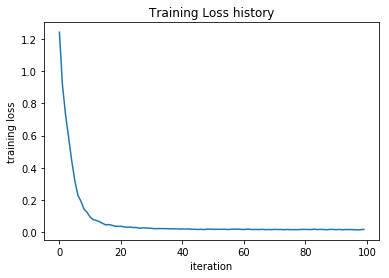

In [6]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [7]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    
    # Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
    try:
       del X_train, y_train
       del X_test, y_test
       print('Clear previously loaded data.')
    except:
       pass

    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


# Train a network
To train our network we will use SGD. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [8]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)


iteration 0 / 1000: loss 2.302954
iteration 100 / 1000: loss 2.302550
iteration 200 / 1000: loss 2.297648
iteration 300 / 1000: loss 2.259602
iteration 400 / 1000: loss 2.204170
iteration 500 / 1000: loss 2.118565
iteration 600 / 1000: loss 2.051535
iteration 700 / 1000: loss 1.988466
iteration 800 / 1000: loss 2.006591
iteration 900 / 1000: loss 1.951473
Validation accuracy:  0.287


# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

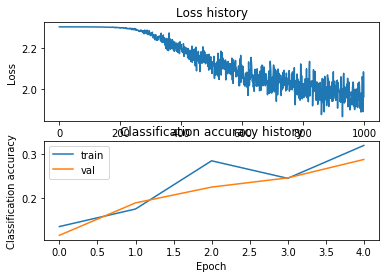

In [9]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()
plt.show()

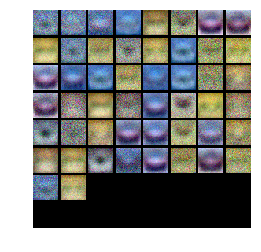

In [10]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can (52% could serve as a reference), with a fully-connected Neural Network. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

**Explain your hyperparameter tuning process below.**

$\color{blue}{\textit Your Answer:}$

iteration 0 / 1500: loss 2.302613
iteration 100 / 1500: loss 1.856233
iteration 200 / 1500: loss 1.717831
iteration 300 / 1500: loss 1.657835
iteration 400 / 1500: loss 1.470362
iteration 500 / 1500: loss 1.483063
iteration 600 / 1500: loss 1.575216
iteration 700 / 1500: loss 1.384562
iteration 800 / 1500: loss 1.554155
iteration 900 / 1500: loss 1.370138
iteration 1000 / 1500: loss 1.527609
iteration 1100 / 1500: loss 1.464493
iteration 1200 / 1500: loss 1.441977
iteration 1300 / 1500: loss 1.486190
iteration 1400 / 1500: loss 1.233595


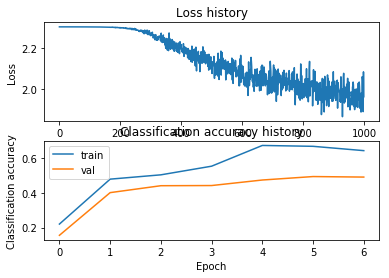

0.492
0.645
iteration 0 / 1500: loss 2.302725
iteration 100 / 1500: loss 1.877766
iteration 200 / 1500: loss 1.741650
iteration 300 / 1500: loss 1.526115
iteration 400 / 1500: loss 1.643455
iteration 500 / 1500: loss 1.490710
iteration 600 / 1500: loss 1.634976
iteration 700 / 1500: loss 1.513085
iteration 800 / 1500: loss 1.541248
iteration 900 / 1500: loss 1.499569
iteration 1000 / 1500: loss 1.392253
iteration 1100 / 1500: loss 1.393716
iteration 1200 / 1500: loss 1.272955
iteration 1300 / 1500: loss 1.365993
iteration 1400 / 1500: loss 1.456062


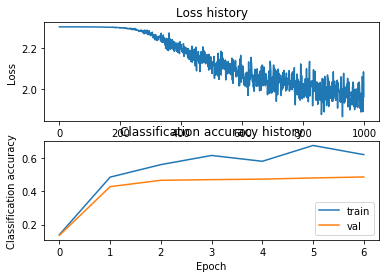

0.486
0.62
iteration 0 / 1500: loss 2.302673
iteration 100 / 1500: loss 1.880576
iteration 200 / 1500: loss 1.779993
iteration 300 / 1500: loss 1.585293
iteration 400 / 1500: loss 1.683623
iteration 500 / 1500: loss 1.520618
iteration 600 / 1500: loss 1.374299
iteration 700 / 1500: loss 1.452900
iteration 800 / 1500: loss 1.535772
iteration 900 / 1500: loss 1.458642
iteration 1000 / 1500: loss 1.471790
iteration 1100 / 1500: loss 1.411896
iteration 1200 / 1500: loss 1.514317
iteration 1300 / 1500: loss 1.477069
iteration 1400 / 1500: loss 1.372081


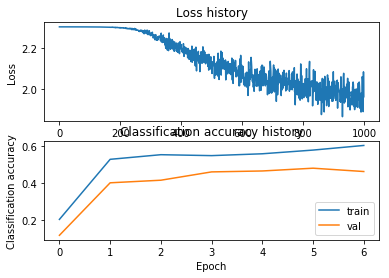

0.464
0.605
iteration 0 / 1500: loss 2.302647
iteration 100 / 1500: loss 1.829523
iteration 200 / 1500: loss 1.714038
iteration 300 / 1500: loss 1.552248
iteration 400 / 1500: loss 1.538246
iteration 500 / 1500: loss 1.562545
iteration 600 / 1500: loss 1.574232
iteration 700 / 1500: loss 1.585126
iteration 800 / 1500: loss 1.587246
iteration 900 / 1500: loss 1.515146
iteration 1000 / 1500: loss 1.544995
iteration 1100 / 1500: loss 1.482126
iteration 1200 / 1500: loss 1.362828
iteration 1300 / 1500: loss 1.300946
iteration 1400 / 1500: loss 1.368684


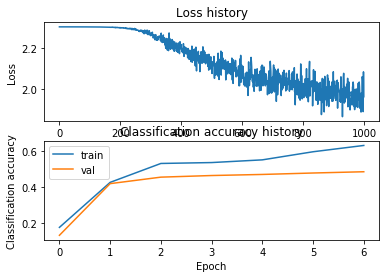

0.484
0.63
iteration 0 / 1500: loss 2.302702
iteration 100 / 1500: loss 1.778946
iteration 200 / 1500: loss 1.649962
iteration 300 / 1500: loss 1.578619
iteration 400 / 1500: loss 1.735998
iteration 500 / 1500: loss 1.471697
iteration 600 / 1500: loss 1.564286
iteration 700 / 1500: loss 1.477106
iteration 800 / 1500: loss 1.522928
iteration 900 / 1500: loss 1.352782
iteration 1000 / 1500: loss 1.498781
iteration 1100 / 1500: loss 1.598836
iteration 1200 / 1500: loss 1.491329
iteration 1300 / 1500: loss 1.454178
iteration 1400 / 1500: loss 1.305131


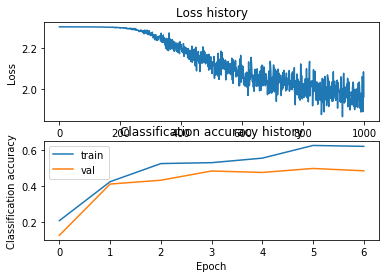

0.485
0.62
iteration 0 / 1500: loss 2.302614
iteration 100 / 1500: loss 1.764051
iteration 200 / 1500: loss 1.746528
iteration 300 / 1500: loss 1.603133
iteration 400 / 1500: loss 1.606211
iteration 500 / 1500: loss 1.434564
iteration 600 / 1500: loss 1.499234
iteration 700 / 1500: loss 1.371405
iteration 800 / 1500: loss 1.425863
iteration 900 / 1500: loss 1.393469
iteration 1000 / 1500: loss 1.395845
iteration 1100 / 1500: loss 1.298116
iteration 1200 / 1500: loss 1.301888
iteration 1300 / 1500: loss 1.372525
iteration 1400 / 1500: loss 1.476700


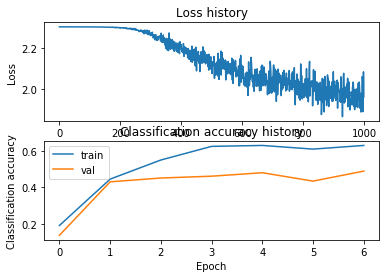

0.489
0.63
iteration 0 / 1500: loss 2.302720
iteration 100 / 1500: loss 1.888457
iteration 200 / 1500: loss 1.660424
iteration 300 / 1500: loss 1.682464
iteration 400 / 1500: loss 1.623134
iteration 500 / 1500: loss 1.581954
iteration 600 / 1500: loss 1.553658
iteration 700 / 1500: loss 1.538440
iteration 800 / 1500: loss 1.455034
iteration 900 / 1500: loss 1.315840
iteration 1000 / 1500: loss 1.504394
iteration 1100 / 1500: loss 1.434272
iteration 1200 / 1500: loss 1.349536
iteration 1300 / 1500: loss 1.435645
iteration 1400 / 1500: loss 1.382765


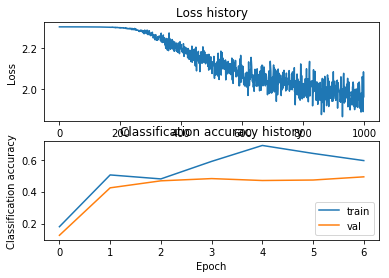

0.493
0.595
iteration 0 / 1500: loss 2.302706
iteration 100 / 1500: loss 1.862255
iteration 200 / 1500: loss 1.702384
iteration 300 / 1500: loss 1.867823
iteration 400 / 1500: loss 1.510197
iteration 500 / 1500: loss 1.606660
iteration 600 / 1500: loss 1.447918
iteration 700 / 1500: loss 1.673198
iteration 800 / 1500: loss 1.425656
iteration 900 / 1500: loss 1.548222
iteration 1000 / 1500: loss 1.210729
iteration 1100 / 1500: loss 1.320535
iteration 1200 / 1500: loss 1.334802
iteration 1300 / 1500: loss 1.359866
iteration 1400 / 1500: loss 1.464160


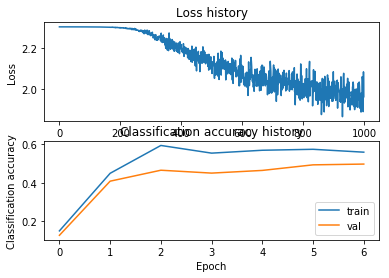

0.498
0.56
iteration 0 / 1500: loss 2.302633
iteration 100 / 1500: loss 1.748271
iteration 200 / 1500: loss 1.535785
iteration 300 / 1500: loss 1.644200
iteration 400 / 1500: loss 1.518650
iteration 500 / 1500: loss 1.433500
iteration 600 / 1500: loss 1.431114
iteration 700 / 1500: loss 1.519074
iteration 800 / 1500: loss 1.479397
iteration 900 / 1500: loss 1.543698
iteration 1000 / 1500: loss 1.369492
iteration 1100 / 1500: loss 1.377360
iteration 1200 / 1500: loss 1.427195
iteration 1300 / 1500: loss 1.392881
iteration 1400 / 1500: loss 1.388543


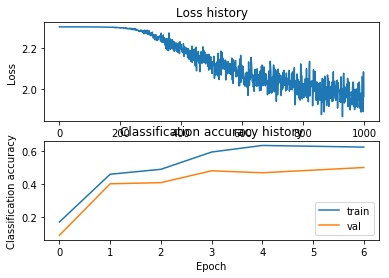

0.501
0.625
iteration 0 / 1500: loss 2.302710
iteration 100 / 1500: loss 1.738584
iteration 200 / 1500: loss 1.608714
iteration 300 / 1500: loss 1.614605
iteration 400 / 1500: loss 1.497130
iteration 500 / 1500: loss 1.537600
iteration 600 / 1500: loss 1.584058
iteration 700 / 1500: loss 1.467171
iteration 800 / 1500: loss 1.662412
iteration 900 / 1500: loss 1.446495
iteration 1000 / 1500: loss 1.561252
iteration 1100 / 1500: loss 1.519584
iteration 1200 / 1500: loss 1.378232
iteration 1300 / 1500: loss 1.387684
iteration 1400 / 1500: loss 1.408191


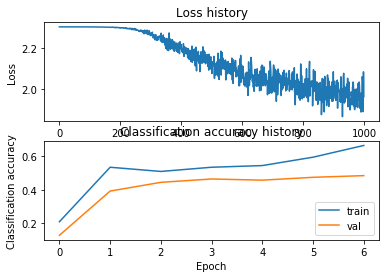

0.485
0.665
iteration 0 / 1500: loss 2.302621
iteration 100 / 1500: loss 1.867232
iteration 200 / 1500: loss 1.711208
iteration 300 / 1500: loss 1.596537
iteration 400 / 1500: loss 1.545160
iteration 500 / 1500: loss 1.415933
iteration 600 / 1500: loss 1.443627
iteration 700 / 1500: loss 1.383172
iteration 800 / 1500: loss 1.393771
iteration 900 / 1500: loss 1.302056
iteration 1000 / 1500: loss 1.359179
iteration 1100 / 1500: loss 1.463938
iteration 1200 / 1500: loss 1.409661
iteration 1300 / 1500: loss 1.250004
iteration 1400 / 1500: loss 1.349248


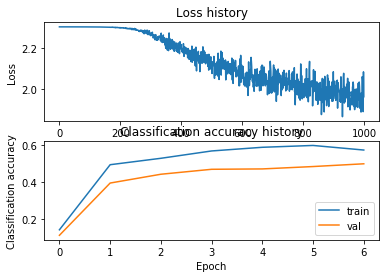

0.5
0.575
iteration 0 / 1500: loss 2.302707
iteration 100 / 1500: loss 1.860878
iteration 200 / 1500: loss 1.719320
iteration 300 / 1500: loss 1.599574
iteration 400 / 1500: loss 1.627819
iteration 500 / 1500: loss 1.620533
iteration 600 / 1500: loss 1.655003
iteration 700 / 1500: loss 1.505808
iteration 800 / 1500: loss 1.485899
iteration 900 / 1500: loss 1.602337
iteration 1000 / 1500: loss 1.428151
iteration 1100 / 1500: loss 1.474034
iteration 1200 / 1500: loss 1.569091
iteration 1300 / 1500: loss 1.339555
iteration 1400 / 1500: loss 1.397603


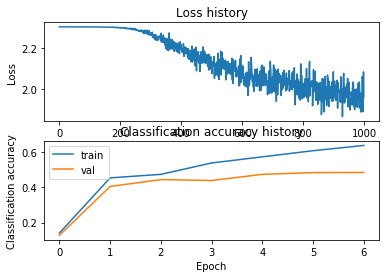

0.486
0.64
iteration 0 / 1500: loss 2.302658
iteration 100 / 1500: loss 1.815339
iteration 200 / 1500: loss 1.700918
iteration 300 / 1500: loss 1.620120
iteration 400 / 1500: loss 1.633634
iteration 500 / 1500: loss 1.504248
iteration 600 / 1500: loss 1.549513
iteration 700 / 1500: loss 1.415274
iteration 800 / 1500: loss 1.482924
iteration 900 / 1500: loss 1.589019
iteration 1000 / 1500: loss 1.474615
iteration 1100 / 1500: loss 1.436068
iteration 1200 / 1500: loss 1.411572
iteration 1300 / 1500: loss 1.425287
iteration 1400 / 1500: loss 1.332192


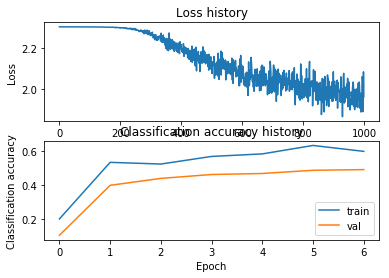

0.492
0.6
iteration 0 / 1500: loss 2.302620
iteration 100 / 1500: loss 1.987688
iteration 200 / 1500: loss 1.668709
iteration 300 / 1500: loss 1.536123
iteration 400 / 1500: loss 1.707947
iteration 500 / 1500: loss 1.528708
iteration 600 / 1500: loss 1.476835
iteration 700 / 1500: loss 1.455013
iteration 800 / 1500: loss 1.384503
iteration 900 / 1500: loss 1.320067
iteration 1000 / 1500: loss 1.309832
iteration 1100 / 1500: loss 1.437283
iteration 1200 / 1500: loss 1.463036
iteration 1300 / 1500: loss 1.346022
iteration 1400 / 1500: loss 1.479244


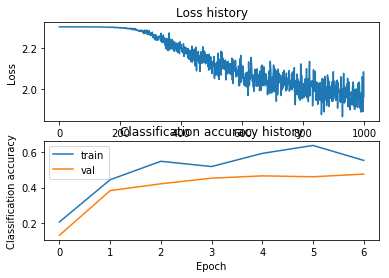

0.477
0.555
iteration 0 / 1500: loss 2.302706
iteration 100 / 1500: loss 1.906103
iteration 200 / 1500: loss 1.617700
iteration 300 / 1500: loss 1.729883
iteration 400 / 1500: loss 1.604196
iteration 500 / 1500: loss 1.589311
iteration 600 / 1500: loss 1.469811
iteration 700 / 1500: loss 1.616986
iteration 800 / 1500: loss 1.524647
iteration 900 / 1500: loss 1.350113
iteration 1000 / 1500: loss 1.437550
iteration 1100 / 1500: loss 1.465370
iteration 1200 / 1500: loss 1.326160
iteration 1300 / 1500: loss 1.399769
iteration 1400 / 1500: loss 1.382721


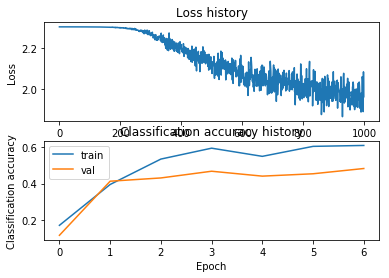

0.483
0.61
lr 1.269032e-03 reg 1.610903e-02 train accuracy: 0.575000 val accuracy: 0.500000
lr 1.269032e-03 reg 3.029560e-02 train accuracy: 0.555000 val accuracy: 0.477000
lr 1.269032e-03 reg 5.723109e-02 train accuracy: 0.600000 val accuracy: 0.492000
lr 1.269032e-03 reg 8.040667e-02 train accuracy: 0.610000 val accuracy: 0.483000
lr 1.269032e-03 reg 8.571627e-02 train accuracy: 0.640000 val accuracy: 0.486000
lr 1.416263e-03 reg 1.610903e-02 train accuracy: 0.645000 val accuracy: 0.492000
lr 1.416263e-03 reg 3.029560e-02 train accuracy: 0.630000 val accuracy: 0.484000
lr 1.416263e-03 reg 5.723109e-02 train accuracy: 0.605000 val accuracy: 0.464000
lr 1.416263e-03 reg 8.040667e-02 train accuracy: 0.620000 val accuracy: 0.485000
lr 1.416263e-03 reg 8.571627e-02 train accuracy: 0.620000 val accuracy: 0.486000
lr 1.630648e-03 reg 1.610903e-02 train accuracy: 0.630000 val accuracy: 0.489000
lr 1.630648e-03 reg 3.029560e-02 train accuracy: 0.625000 val accuracy: 0.501000
lr 1.630648e-03 r

In [24]:
best_net = None # store the best model into this 

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
from cs231n.classifiers import neural_net
import statistics
results = {}
best_val = -1
best_net = None
learning_rates = np.random.uniform(low = 1e-3, high = 2e-3, size = (3, ))
regularization_strengths = np.random.uniform(low = 0.01, high = 0.1, size = (5, ))

for i in range(len(learning_rates)):
    for j in range(len(regularization_strengths)):
        loss_history = []
        train_acc_history = []
        val_acc_history = []
        twolayernet = TwoLayerNet(input_size, hidden_size, num_classes)
        dic  = twolayernet.train(X_train, y_train, X_val, y_val, learning_rates[i],0.95,  regularization_strengths[j], 1500, 200, True)
        loss_history, train_acc_history, val_acc_history = dic['loss_history'], dic['train_acc_history'], dic['val_acc_history']
        plt.subplot(2, 1, 1)
        plt.plot(stats['loss_history'])
        plt.title('Loss history')
        plt.xlabel('Iteration')
        plt.ylabel('Loss')

        plt.subplot(2, 1, 2)
        plt.plot(train_acc_history, label='train')
        plt.plot(val_acc_history, label='val')
        plt.title('Classification accuracy history')
        plt.xlabel('Epoch')
        plt.ylabel('Classification accuracy')
        plt.legend()
        plt.show()
        val_acc = val_acc_history[len(val_acc_history) - 1]
        train_acc = train_acc_history[len(train_acc_history) - 1]
        print(val_acc)
        print(train_acc)
        results[(learning_rates[i], regularization_strengths[j])] = (train_acc, val_acc)
        if(val_acc > best_val):
            best_val = val_acc
            best_net = twolayernet
pass
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)
# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****


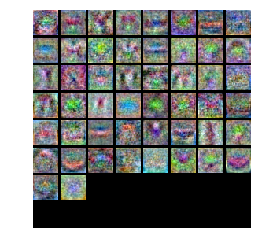

In [25]:

# visualize the weights of the best network
show_net_weights(best_net)

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

In [26]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.489


**Inline Question**

Now that you have trained a Neural Network classifier, you may find that your testing accuracy is much lower than the training accuracy. In what ways can we decrease this gap? Select all that apply.

1. Train on a larger dataset.
2. Add more hidden units.
3. Increase the regularization strength.
4. None of the above.

$\color{blue}{\textit Your Answer:}$

$\color{blue}{\textit Your Explanation:}$

